<a href="https://colab.research.google.com/github/ParijatSutradhar04/ML_PracticeModels/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

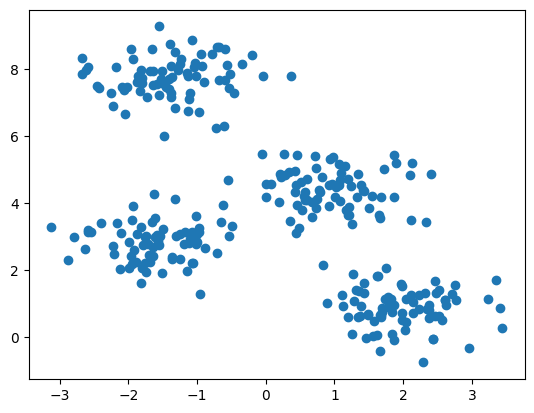

In [ ]:
import matplotlib.pyplot as plt

# Plot the data
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [30]:
import numpy

def dbscan(D, eps, MinPts):
    '''
    Cluster the dataset `D` using the DBSCAN algorithm.

    dbscan takes a dataset `D` (a list of vectors), a threshold distance
    `eps`, and a required number of points `MinPts`.

    It will return a list of cluster labels. The label -1 means noise, and then
    the clusters are numbered starting from 1.
    '''

    # This list will hold the final cluster assignment for each point in D.
    # There are two reserved values:
    #    -1 - Indicates a noise point
    #     0 - Means the point hasn't been considered yet.
    # Initially all labels are 0.
    labels = [0]*len(D)

    # C is the ID of the current cluster.
    C = 0

    # This outer loop is just responsible for picking new seed points--a point
    # from which to grow a new cluster.
    # Once a valid seed point is found, a new cluster is created, and the
    # cluster growth is all handled by the 'expandCluster' routine.

    # For each point P in the Dataset D...
    # ('P' is the index of the datapoint, rather than the datapoint itself.)
    for P in range(0, len(D)):

        # Only points that have not already been claimed can be picked as new
        # seed points.
        # If the point's label is not 0, continue to the next point.
        if not (labels[P] == 0):
           continue

        # Find all of P's neighboring points.
        NeighborPts = region_query(D, P, eps)

        # If the number is below MinPts, this point is noise.
        # This is the only condition under which a point is labeled
        # NOISE--when it's not a valid seed point. A NOISE point may later
        # be picked up by another cluster as a boundary point (this is the only
        # condition under which a cluster label can change--from NOISE to
        # something else).
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        # Otherwise, if there are at least MinPts nearby, use this point as the
        # seed for a new cluster.
        else:
           C += 1
           grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts)

    # All data has been clustered!
    return labels


def grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts):
    '''
    Grow a new cluster with label `C` from the seed point `P`.

    This function searches through the dataset to find all points that belong
    to this new cluster. When this function returns, cluster `C` is complete.

    Parameters:
      `D`      - The dataset (a list of vectors)
      `labels` - List storing the cluster labels for all dataset points
      `P`      - Index of the seed point for this new cluster
      `NeighborPts` - All of the neighbors of `P`
      `C`      - The label for this new cluster.
      `eps`    - Threshold distance
      `MinPts` - Minimum required number of neighbors
    '''

    # Assign the cluster label to the seed point.
    labels[P] = C

    # Look at each neighbor of P (neighbors are referred to as Pn).
    # NeighborPts will be used as a FIFO queue of points to search--that is, it
    # will grow as we discover new branch points for the cluster. The FIFO
    # behavior is accomplished by using a while-loop rather than a for-loop.
    # In NeighborPts, the points are represented by their index in the original
    # dataset.
    i = 0
    while i < len(NeighborPts):

        # Get the next point from the queue.
        Pn = NeighborPts[i]

        # If Pn was labelled NOISE during the seed search, then we
        # know it's not a branch point (it doesn't have enough neighbors), so
        # make it a leaf point of cluster C and move on.
        if labels[Pn] == -1:
           labels[Pn] = C

        # Otherwise, if Pn isn't already claimed, claim it as part of C.
        elif labels[Pn] == 0:
            # Add Pn to cluster C (Assign cluster label C).
            labels[Pn] = C

            # Find all the neighbors of Pn
            PnNeighborPts = region_query(D, Pn, eps)

            # If Pn has at least MinPts neighbors, it's a branch point!
            # Add all of its neighbors to the FIFO queue to be searched.
            if len(PnNeighborPts) >= MinPts:
                NeighborPts = NeighborPts + PnNeighborPts
            # If Pn *doesn't* have enough neighbors, then it's a leaf point.
            # Don't queue up it's neighbors as expansion points.
            #else:
                # Do nothing
                #NeighborPts = NeighborPts

        # Advance to the next point in the FIFO queue.
        i += 1

    # We've finished growing cluster C!


def region_query(D, P, eps):
    '''
    Find all points in dataset `D` within distance `eps` of point `P`.

    This function calculates the distance between a point P and every other
    point in the dataset, and then returns only those points which are within a
    threshold distance `eps`.
    '''
    neighbors = []

    # For each point in the dataset...
    for Pn in range(0, len(D)):

        # If the distance is below the threshold, add it to the neighbors list.
        if numpy.linalg.norm(D[P] - D[Pn]) < eps:
           neighbors.append(Pn)

    return neighbors

In [48]:
labels = dbscan(X, 0.65, 10)
numpy.unique(labels)

array([-1,  1,  2,  3,  4])

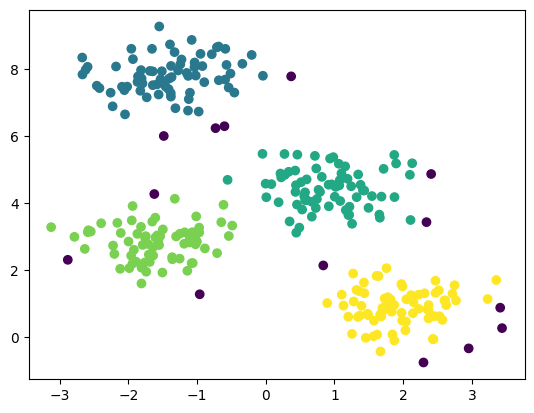

In [49]:
#plot the DBSCAN result
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()